In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

def compute_relative_error(approx, ref, eps=1e-14):
    """
    Compute the relative L2 error between an approximate and a reference vector.
    
    Parameters
    ----------
    approx : ndarray
        Approximate vector.
    ref    : ndarray
        Reference vector.
    eps    : float
        A small value to avoid division by zero.
        
    Returns
    -------
    error : float
        The relative L2 error: ||approx - ref|| / (||ref|| + eps).
    """
    error = np.linalg.norm(approx - ref) / (np.linalg.norm(ref) + eps)
    return error

def calculate_sq(ut,P):
    f=0
    for i in range(1,P):
        f+= ut[i,:,:]**2
    return  f


1
2
4
6
1
2
4
6
1
2
4
6
1
8
32
35
[1 2 4 6]


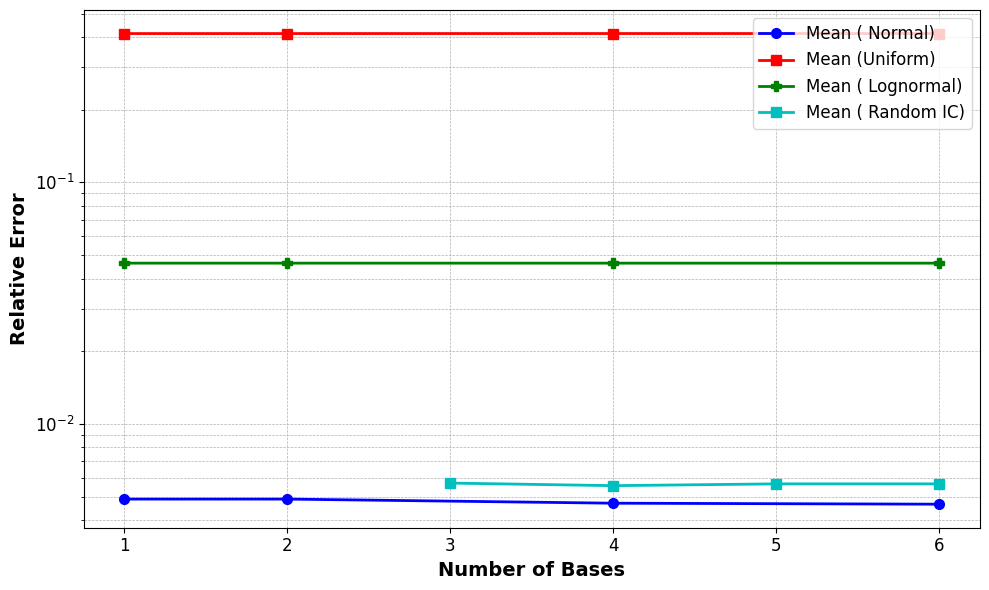

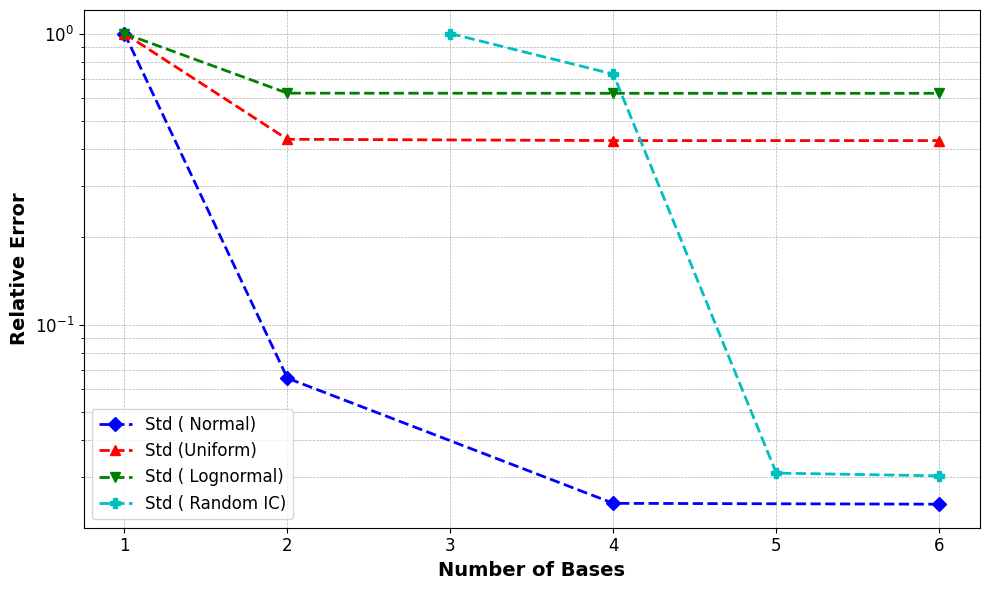

In [2]:

# ------------------- USER SETTINGS ------------------- #
data_folder = './data'      # Folder where your .pkl/.npy files are stored
dist_names = ['Normal', 'Uniform', 'Lognormal', 'Random IC']
n_bases = 4                 # Number of basis functions to test

# Initialize error storage
errors = {dist: {'mean': [], 'std': []} for dist in dist_names}

# ------------- LOAD APPROXIMATE VECTORS & COMPUTE ERRORS -------------- #
for i, dist in enumerate(dist_names):
    # Load reference mean and std for the given distribution (using experiment index i+1)
    with open(os.path.join(data_folder, f'results_exp{i+1}_MEAN_mcs.pkl'), 'rb') as file:
        mean_ref = pickle.load(file)
    with open(os.path.join(data_folder, f'results_exp{i+1}_STD_mcs.pkl'), 'rb') as file:
        std_ref = pickle.load(file)
        
    for k in range(n_bases):
        # Define file name for the approximate data file for the current basis count
        if(k==0):
            path = os.path.join(data_folder, f"results_exp{i+1}_0{k}.pkl")
            P=1
        elif(i==3):
            path = os.path.join(data_folder, f"results_exp{i+1}_0{k+1}.pkl")
            P=file_content.shape[0]
        else:
            path = os.path.join(data_folder, f"results_exp{i+1}_0{k-1}.pkl")
            P=2*k
        
        if not os.path.exists(path):
            raise FileNotFoundError(f"Approximate file not found: {path}")
        
        print(P)
        # Load the approximate file
        with open(path, 'rb') as f:
            file_content = pickle.load(f)
        
        # print(file_content.shape)
        # Extract approximate mean and std vectors
        # Adjust the slicing below if your data structure is different.
        
        mean_approx = file_content[0, :,:]
        # Assuming calculate_sq returns a filename for the std vector, then load it:
        std_approx = np.sqrt(calculate_sq(file_content, P))
        
        # Compute relative errors for mean and std
        mean_err = compute_relative_error(mean_approx, mean_ref)
        std_err = compute_relative_error(std_approx, std_ref)
        
        errors[dist]['mean'].append(mean_err)
        errors[dist]['std'].append(std_err)

# --------------------- PLOTTING ---------------------- #
num_bases_array = 2 * np.arange(0, n_bases)
num_bases_array2 = np.arange(0, n_bases)+3
num_bases_array[0]=1
print(num_bases_array)

# Define plotting styles for each distribution
mean_styles = {
    'Normal':  ('o-b', 'Mean ( Normal)'),
    'Uniform':    ('s-r', 'Mean (Uniform)'),
    'Lognormal':  ('P-g', 'Mean ( Lognormal)'),
    'Random IC': ('s-c', 'Mean ( Random IC)')
}
std_styles = {
    'Normal':  ('D--b', 'Std ( Normal)'),
    'Uniform':    ('^--r', 'Std (Uniform)'),
    'Lognormal':  ('v--g', 'Std ( Lognormal)'),
    'Random IC': ('P--c', 'Std ( Random IC)')
}

plt.figure(figsize=(10, 6))

for dist in dist_names:
    # Plot mean errors
    line_style, label_str = mean_styles[dist]
    if(dist=='Random IC'):
        plt.plot(num_bases_array2, errors[dist]['mean'], line_style,label=label_str, linewidth=2, markersize=7)
        break
    plt.plot(num_bases_array, errors[dist]['mean'], line_style,
             label=label_str, linewidth=2, markersize=7)

plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Number of Bases', fontsize=14, weight='bold')
plt.ylabel('Relative Error', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

for dist in dist_names:
    # Plot standard deviation errors
    line_style, label_str = std_styles[dist]
    if(dist=='Random IC'):
        plt.plot(num_bases_array2, errors[dist]['std'], line_style,label=label_str, linewidth=2, markersize=7)
        break
    plt.plot(num_bases_array, errors[dist]['std'], line_style,
             label=label_str, linewidth=2, markersize=7)

plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Number of Bases', fontsize=14, weight='bold')
plt.ylabel('Relative Error', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [4]:
errors.keys()

dict_keys(['Normal', 'Uniform', 'Lognormal', 'Random IC'])

In [7]:
errors['Normal']['std'][-1]

0.024150001483363673

In [8]:
errors['Uniform']['std'][-1]

0.42870882235358476

In [9]:
errors['Lognormal']['std'][-1]

0.6232490693270392

In [10]:
errors['Random IC']['std'][-1]

0.030218670167526582